# Fundamentals of machine learning

Supose I want to know the weight of a person based on its height. Since I know machine learning, I want to build a model based on data.

In [1]:
heights = [130, 150, 165, 170, 190, 210]
weights = [40, 60, 65, 80, 92, 130]

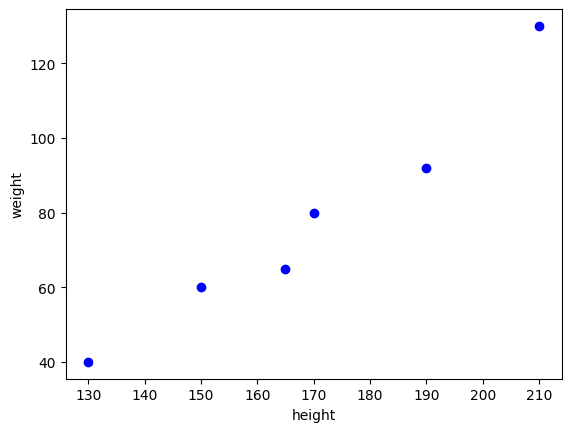

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(heights)
y = np.array(weights)
points = np.column_stack((x, y))

plt.scatter(points[:, 0], points[:, 1], color='blue', label='Random Points')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

Now, lets find the best linear model that explains explains the relationship between the variables

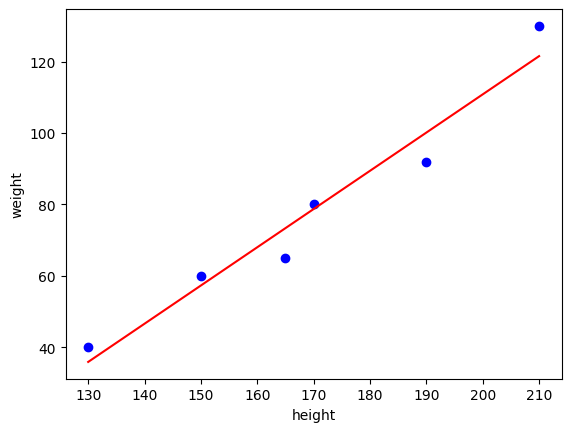

In [3]:
line_coefficients = np.polyfit(x, y, deg=1)
line = np.poly1d(line_coefficients)
x_line = np.linspace(x[0], x[-1], 100)
y_line = line(x_line)
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Random Points')
plt.plot(x_line, y_line, color='red', label='Best Fit Line')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

Take a look to the parameters learned by the model. Since it is a line, we have the line angle and the constant parameter (also known as the **bias**)

In [4]:
line_coefficients

array([   1.07046632, -103.25388601])

**Terminology**: 
- The **degree of freedom** of a model represents the number of values that are free to vary when fitting the model.
- **Model training** or **model fitting** is the process of automatically adjust the model parameters in order to fit the data.
- A **loss function**, also known as a **cost function** or **objective function**, is a measure used to quantify the discrepancy or error between the predicted output of a machine learning model and the actual target output.
    - Model training adjust the model parameters in order to minimize the loss function

There are some differences between the predictions and the model, that may be due to other factors that impact in the person weight. Lets measure the differences:

In [5]:
from sklearn.metrics import root_mean_squared_error
y_line_pred = line(x)

mse_line = root_mean_squared_error(y, y_line_pred)
me_line = np.mean(np.abs(y - y_line_pred))
me_line, mse_line

(5.502590673575146, 6.23655721863257)

Now lets test a polynomial model, with more degrees of freedom.

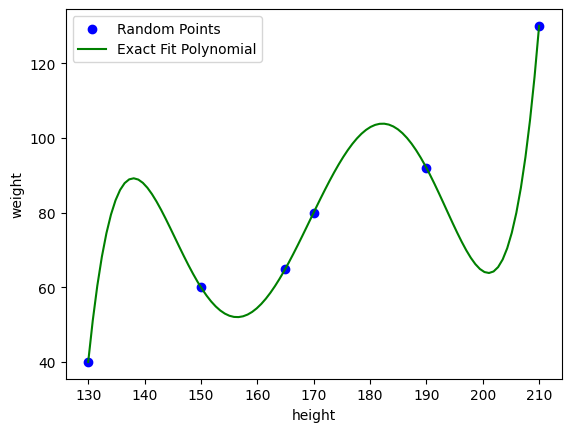

In [6]:
# Fit a higher-degree polynomial to the points
poly_coefficients = np.polyfit(x, y, deg=len(x) - 1)
poly = np.poly1d(poly_coefficients)
x_poly = np.linspace(x[0], x[-1], 100)
y_poly = poly(x_poly)
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Random Points')
plt.plot(x_poly, y_poly, color='green', label='Exact Fit Polynomial')

plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.show()

This model has more degrees of freedom that the line:

In [7]:
poly_coefficients

array([ 3.77744709e-06, -3.19989253e-03,  1.07696065e+00, -1.79988917e+02,
        1.49363328e+04, -4.92285776e+05])

lets calculate the error

In [8]:
y_poly_pred = poly(x)

# Calculate the mean square error for the line and polynomial models
mse_line = root_mean_squared_error(y, y_poly_pred)
me_line = np.mean(np.abs(y - y_poly_pred))
me_line, mse_line

(2.6096434642871222e-09, 3.432689568482755e-09)

So, the model was able to fit almost perfectly the training data.
- Is this model better than the line?

Note that we build models for working on all posible data, not only on training data.
- Training data is used as a tool for automaticall inferring the model

Lets test both models with some data that was not used in the training procedure.

In [9]:
heights_other = [140, 160, 180, 201]
weights_other = [59, 66, 85, 130]

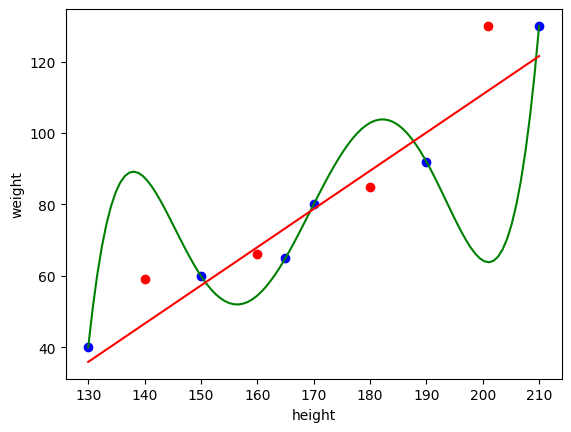

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x_test = np.array(heights_other)
y_test = np.array(weights_other)
plt.plot(x_poly, y_poly, color='green', label='Exact Fit Polynomial')
plt.plot(x_line, y_line, color='red', label='Best Fit Line')

plt.scatter(points[:, 0], points[:, 1], color='blue', label='Random Points')
plt.scatter(x_test, y_test, color='red', label='Random Points')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

Now, lets repeat the evaluation using the new points. Using the linear model:

In [ ]:
y_line_test = line(x_test)

mse_line = root_mean_squared_error(y_test, y_line_test)
me_line = np.mean(np.abs(y_test - y_line_test))
print("Errors using line:", (me_line, mse_line))
# previous error: (5.502590673575146, 38.894645941278014)

- Errors are larger on testing data, as expected

In [11]:
y_line_test = poly(x_test)

mse_line = root_mean_squared_error(y_test, y_line_test)
me_line = np.mean(np.abs(y_test - y_line_test))
print("Errors using polygon:", (me_line, mse_line))
# previous error: (1.3872825851043065e-09, 4.46725176381918e-18)

Errors using polygon: (31.01902348511794, 37.56663238231373)


**Note**: On unseen data, errors of the more complex model were significantly larger than errors of the simpler model.

**Terminology**: 
- **Generalization** refers to the ability of a trained model to perform accurately and make reliable predictions on unseen or new data that it hasn't encountered during the training process. 
    - It measures how well the model can apply the patterns and relationships learned from the training data to make predictions on previously unseen examples.
- **Overtraining**, also known as **overfitting**, refers to a situation in machine learning where a trained model performs extremely well on the training data but fails to generalize well to new, unseen data. 
    - In other words, the model becomes too specialized in capturing the noise and idiosyncrasies of the training data, leading to poor performance on previously unseen examples.
    - Overtraining degrades generalization

    
Lets see now other example. We want to estimate the maximum speed that a runner can achieve based on his height. This is training data.

In [12]:
height = [130, 140, 142, 160, 175, 183, 195, 210, 230]
max_speed = [1.1, 1.5, 1.45, 2, 2.9, 3, 2.1, 1.4, 0.9]
x = np.array(height)
y = np.array(max_speed)

Lets plot the points

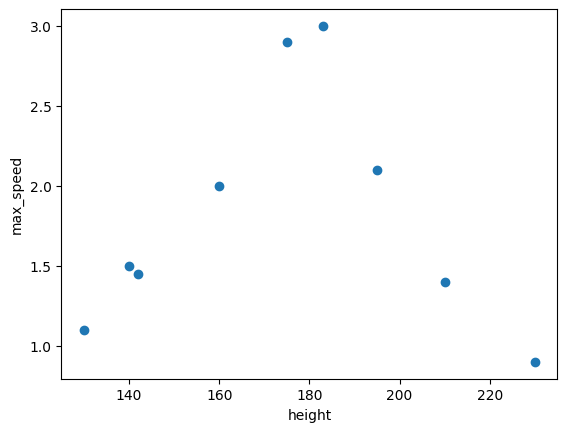

In [13]:
plt.scatter(x, y)
plt.xlabel('height')
plt.ylabel('max_speed')
plt.show()

Now, lets train a linear model

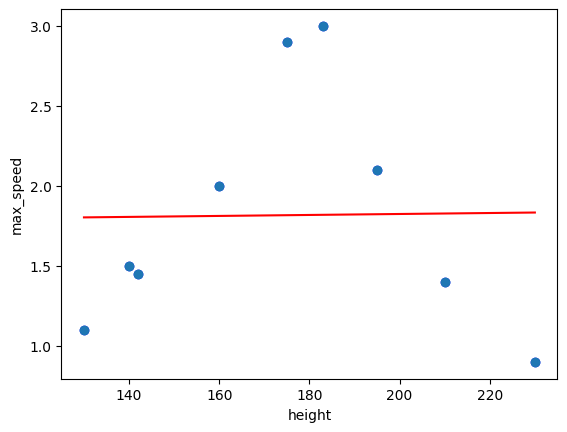

In [14]:
line_coefficients = np.polyfit(x, y, deg=1)
line = np.poly1d(line_coefficients)
x_line = np.linspace(x[0], x[-1], 100)
y_line = line(x_line)
plt.scatter(x, y, color='blue', label='Random Points')
plt.plot(x_line, y_line, color='red', label='Best Fit Line')
plt.scatter(x, y)
plt.xlabel('height')
plt.ylabel('max_speed')
plt.show()

You can see now that the linear model was unable to capture the information in the training sample. It is because it has too few degrees of freedom to represent the complexity of the problem.

Lets try with a polynomial of degree 3.

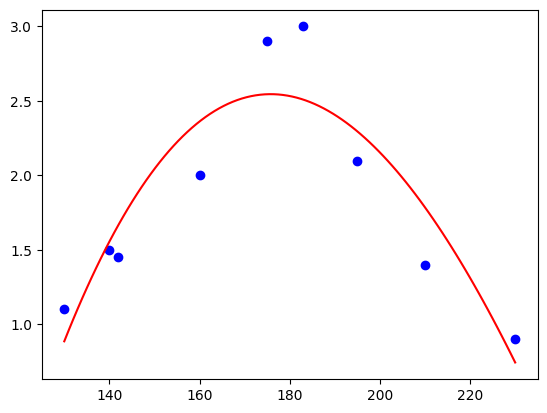

In [15]:
line_coefficients = np.polyfit(x, y, deg=3)
line = np.poly1d(line_coefficients)
x_line = np.linspace(x[0], x[-1], 100)
y_line = line(x_line)
plt.scatter(x, y, color='blue', label='Random Points')
plt.plot(x_line, y_line, color='red', label='Best Fit Line')
plt.show()

Now, our model reflects more accuratelly the relations between the feature and the predictor variable.

**Definitions**:
- **Undertraining**, also known as **underfitting**, refers to a situation in machine learning where a trained model fails to capture the underlying patterns and relationships present in the training data. 
    - An undertrained model is unable to sufficiently learn from the data and therefore performs poorly both on the training data and on new, unseen data.
    - Too few degrees of freedom might cause underfitting, but it is not the only cause
    
**Note**: Do not forget overfitting!

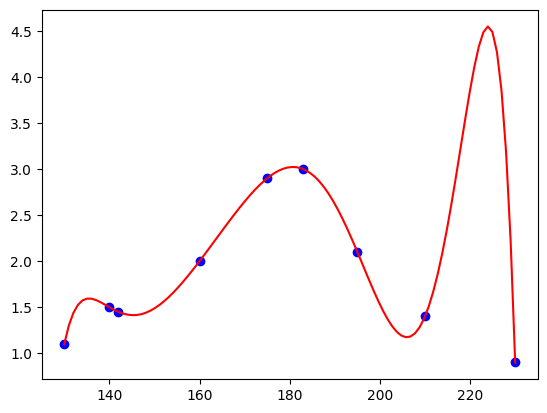

In [16]:
line_coefficients = np.polyfit(x, y, deg=len(x)-1)
line = np.poly1d(line_coefficients)
x_line = np.linspace(x[0], x[-1], 100)
y_line = line(x_line)
plt.scatter(x, y, color='blue', label='Random Points')
plt.plot(x_line, y_line, color='red', label='Best Fit Line')
plt.show()